In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ast

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [152]:
## Convert csv to h5 and store
# h5 reference: https://realpython.com/fast-flexible-pandas/#selecting-data-with-isin

strava_data = pd.read_csv('raw_strava_data.csv')
# Convert data to usable things
strava_data['elapsed_time'] = pd.to_timedelta(strava_data['elapsed_time'])
            
strava_data['moving_time'] = pd.to_timedelta(strava_data['moving_time'])

strava_data['start_date_local'] = pd.to_datetime(strava_data['start_date_local'])

# The map dictionary is a string coming from the csv
strava_data["map"] = strava_data['map'].apply(ast.literal_eval)

# Create storage object with filename `processed_data`
data_store = pd.HDFStore('strava_data.h5')

# Put DataFrame into the object setting the key as 'preprocessed_df'
data_store['strava_data'] = strava_data
data_store.close()

/usr/local/lib/python3.5/dist-packages/ipython-6.4.0-py3.5.egg/IPython/core/interactiveshell.py:2963: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->['start_date', 'timezone', 'athlete', 'map', 'end_latlng', 'external_id', 'type', 'name', 'device_watts', 'start_latlng']]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [149]:
# Access data store
strava_data_h5 = pd.HDFStore('strava_data.h5')

# Retrieve data using key
strava_data = strava_data_h5['strava_data']
strava_data_h5.close()

In [22]:
morning_mask = strava_data['start_date_local'].dt.hour < 10
evening_mask = strava_data['start_date_local'].dt.hour > 13 
weekday_mask = strava_data['start_date_local'].dt.weekday < 5


In [103]:
morning_mask = strava_data['start_date_local'].dt.hour.isin(range(7, 11))
evening_mask = strava_data['start_date_local'].dt.hour.isin(range(14, 20))
weekday_mask = strava_data['start_date_local'].dt.weekday.isin(range(0, 5))
normal_time_mask = ((strava_data['moving_time'].dt.seconds / 60) > 10) & ((strava_data['moving_time'].dt.seconds / 60) < 30)

In [104]:
morning_commutes = strava_data[morning_mask & weekday_mask & normal_time_mask]
evening_commutes = strava_data[evening_mask & weekday_mask & normal_time_mask]

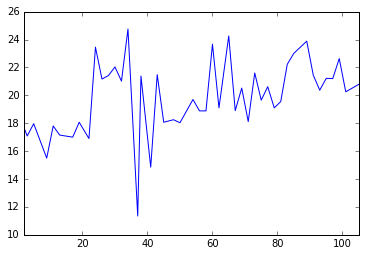

In [106]:
(evening_commutes['moving_time'] / pd.Timedelta(minutes=1)).plot()
plt.show()

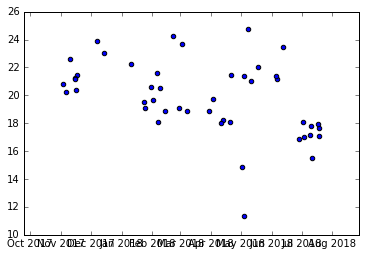

In [107]:
to_plot = evening_commutes.copy()
to_plot['moving_time'] = to_plot.loc[:,'moving_time'] / pd.Timedelta(minutes=1)
plt.scatter(to_plot['start_date_local'].dt.to_pydatetime(), to_plot['moving_time'])
plt.show()

In [180]:
test2[1]

(-84.38523,
 -84.38491,
 -84.38451,
 -84.37994,
 -84.37931,
 -84.36856,
 -84.36603,
 -84.36414)

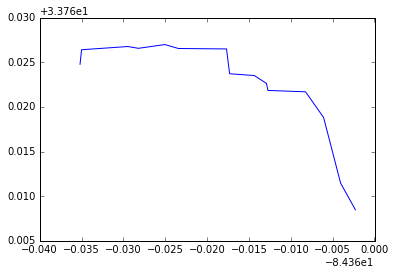

In [204]:
pl = strava_data['map'][21]["summary_polyline"]
test = polyline.decode(pl)
test2 = list((zip(*test)))
plt.plot(test2[1], test2[0])

In [201]:
test2

[(33.78515,
  33.78622,
  33.78627,
  33.78314,
  33.78285,
  33.78159,
  33.78162,
  33.77826,
  33.77811,
  33.77682,
  33.77675,
  33.77627,
  33.77585,
  33.78188,
  33.78187,
  33.77863,
  33.77114,
  33.76855),
 (-84.39517,
  -84.39517,
  -84.39601,
  -84.39598,
  -84.39496,
  -84.39475,
  -84.39361,
  -84.39365,
  -84.39218,
  -84.39198,
  -84.38758,
  -84.38748,
  -84.37999,
  -84.37918,
  -84.36846,
  -84.36604,
  -84.36398,
  -84.36227)]

In [197]:
strava_data

,start_date,calories,start_longitude,best_efforts,kilojoules,utc_offset,trainer,average_speed,elev_low,comment_count,...,segment_leaderboard_opt_out,device_watts,upload_id,athlete_count,segment_efforts,total_elevation_gain,elev_high,flagged,commute,start_latlng
0,2018-07-24T00:41:27+00:00,NaN,-84.37,NaN,NaN,-14400,False,3.132,274.0,0,...,NaN,NaN,1849749965,1,NaN,18.6,282.5,False,False,"33.77,-84.37"
1,2018-07-19T01:14:56+00:00,NaN,-84.39,NaN,71.1,-14400,False,5.966,265.4,0,...,NaN,False,1837271625,1,NaN,35.6,309.2,False,False,"33.77,-84.39"
2,2018-07-18T23:45:46+00:00,NaN,-84.37,NaN,125.8,-14400,False,4.398,266.0,0,...,NaN,False,1837164348,1,NaN,72.9,309.2,False,False,"33.77,-84.37"
3,2018-07-18T21:03:22+00:00,NaN,-84.40,NaN,119.9,-14400,False,5.493,266.0,0,...,NaN,False,1836919338,2,NaN,65.2,296.0,False,False,"33.78,-84.4"
4,2018-07-18T12:30:28+00:00,NaN,-84.37,NaN,111.1,-14400,False,5.096,266.0,0,...,NaN,False,1835761775,1,NaN,65.0,296.0,False,False,"33.77,-84.37"
5,2018-07-17T21:24:16+00:00,NaN,-84.40,NaN,106.9,-14400,False,4.978,266.0,0,...,NaN,False,1834554251,1,NaN,60.8,296.0,False,False,"33.78,-84.4"
6,2018-07-17T12:08:20+00:00,NaN,-84.37,NaN,113.8,-14400,False,4.919,266.0,0,...,NaN,False,1833305196,1,NaN,71.6,296.0,False,False,"33.77,-84.37"
7,2018-07-15T20:43:07+00:00,NaN,-84.40,NaN,104.6,-14400,False,3.967,273.9,0,...,NaN,False,1830174237,1,NaN,55.8,322.9,False,False,"33.76,-84.4"
8,2018-07-15T14:34:16+00:00,NaN,-84.37,NaN,142.0,-14400,False,4.371,273.9,0,...,NaN,False,1829415573,1,NaN,97.4,323.0,False,False,"33.77,-84.37"
9,2018-07-11T21:08:20+00:00,NaN,-84.40,NaN,112.8,-14400,False,5.899,266.0,0,...,NaN,False,1820900456,1,NaN,60.1,295.8,False,False,"33.79,-84.4"


In [141]:
# https://markhneedham.com/blog/2017/04/29/leaflet-strava-polylines-osm/
# https://dzone.com/articles/strava-calculating-the-similarity-of-two-runs
# http://bl.ocks.org/matt-leach/5336dc8249cf4401fc0f6b31743202e5
# http://andykee.com/visualizing-strava-tracks-with-python.html
# https://gis.stackexchange.com/questions/42224/creating-polyline-based-heatmap-from-gps-tracks
# https://yizeng.me/2017/01/11/get-a-strava-api-access-token-with-write-permission/

0      {'summary_polyline': None, 'id': 'a1723496246'...
1      {'summary_polyline': '_scmEtn`bOfC_AwKoA`@q[{c...
2      {'summary_polyline': 'elbmEf_|aOcOhIum@xKqS~NH...
3      {'summary_polyline': 'gpemEhmbbOj@z@oCkA~@u@e@...
4      {'summary_polyline': 'clbmEd_|aOcPnIen@dLqRbNJ...
5      {'summary_polyline': 'epemEvlbbOoJS{@wk@j@_SwA...
6      {'summary_polyline': '_acmExj|aO{g@|I{T`ODnYiC...
7      {'summary_polyline': '_~_mElzbbOkD_NaKeP}Lq@Vo...
8      {'summary_polyline': 'albmEd_|aOaBRxLwLnO_CUcL...
9      {'summary_polyline': 'wvemEnmbbOmD]Uod@sBwGlAc...
10     {'summary_polyline': 'elbmEd_|aOyOlIol@hKmS|MO...
11     {'summary_polyline': '{qemE`kbbOt@zA_ILuA_KDc\...
12     {'summary_polyline': '}kbmEh_|aOoPlIwk@bKuL`Hk...
13     {'summary_polyline': 'ewemEnmbbOiCOUoc@{A}Fv@@...
14     {'summary_polyline': 'mlbmEd_|aOgP|Iel@bK}SlNJ...
15     {'summary_polyline': '}ncmEvl`bOaLmAj@s[wc@_CS...
16     {'summary_polyline': 'clbmEd_|aOoSlKai@rIkTdOX...
17     {'summary_polyline': 'ou